# Creating smooth spatial fields

In [1]:
using CartesianGrids

┌ Info: Precompiling CartesianGrids [3e975e5d-2cf8-4263-9573-8460aaf534d9]
└ @ Base loading.jl:1278


In [2]:
using Plots

In [3]:
f = Gaussian(0.2,1)

Gaussian (σ = 0.2, A = 1.0)

In [4]:
f(0.2)

1.0377687435514866

In [5]:
σ = rand()

0.17386128218739638

In [6]:
onegauss = SpatialGaussian(σ,σ,0.0,0.5,1)

SpatialGaussian{false,CartesianGrids.ShiftedProfile{Float64,Gaussian},CartesianGrids.ShiftedProfile{Float64,Gaussian}}(Gaussian (σ = 0.17, A = 1.0) >> 0.0, Gaussian (σ = 0.17, A = 1.0) >> 0.5, 1.0, 0.0, 0.0)

In [7]:
onegauss(σ,0.5)

3.873913232006538

In [8]:
onegauss(rand(2)...)

0.03741298403160551

In [9]:
field = EmptySpatialField()
for x in [-0.5,0,0.5], y in [-0.5,0,0.5]
  field += SpatialGaussian(0.2,0.5,x,y,1,0.5,1)
end

In [10]:
field(0.5,0,1)

1.2344376654766014

In [11]:
field2 = -field;

In [12]:
field2(0.5,0,1)

-1.2344376654766014

In [13]:
gr = PhysicalGrid((-3.0,3.0),(-2.0,2.0),0.03)

PhysicalGrid{2}((208, 140), (104, 70), 0.03, ((-3.09, 3.09), (-2.07, 2.07)))

In [14]:
w = Nodes(Dual,size(gr));

In [15]:
@time gfield = GeneratedField(w,field,gr);

  1.897843 seconds (8.84 M allocations: 314.205 MiB, 19.00% gc time)


In [16]:
datatype(gfield)

Nodes{Dual,208,140,Float64,Array{Float64,2}}

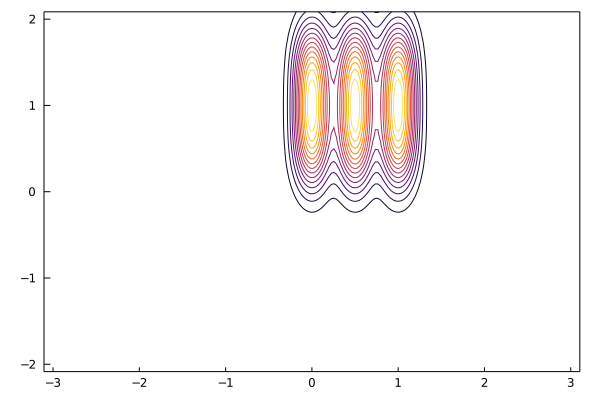

In [17]:
plot(gfield(1.0),gr)

In [19]:
q = Edges(Primal,w);

In [20]:
@time qfield = GeneratedField(q,field,onegauss,gr);

  0.899836 seconds (6.11 M allocations: 190.898 MiB, 4.37% gc time)


In [21]:
@time q .= qfield(-2);

  0.584419 seconds (5.02 M allocations: 144.318 MiB, 6.39% gc time)


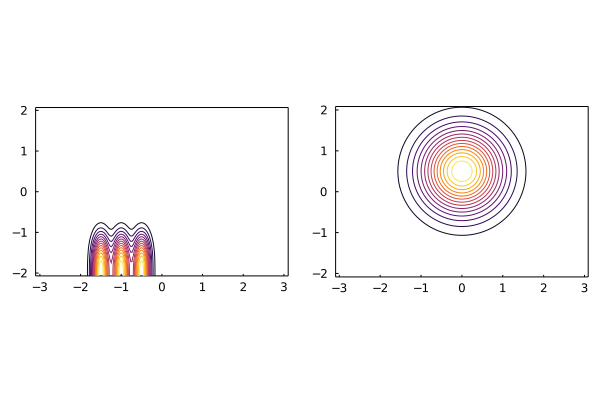

In [22]:
plot(
    plot(q.u,gr),
    plot(q.v,gr)
    )

In [23]:
tfield = GeneratedField(EdgeGradient(Dual,q),[field,SpatialGaussian(0.5,0,0,1),EmptySpatialField(),EmptySpatialField()],gr);

In [24]:
maximum(tfield().dudy)

1.2732395447351625

In [25]:
ffield = PulseField(tfield,0.5,0.1);
xux, yux = coordinates(tfield().dudx,gr)
xuy, yuy = coordinates(tfield().dudy,gr)

(-3.09:0.03:3.09, -2.07:0.03:2.07)

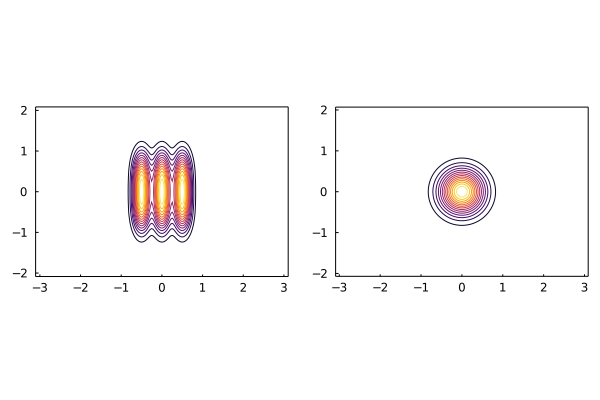

In [26]:
plot(
    plot(xux,yux,ffield(0.5).dudx),
    plot(xuy,yuy,ffield(0.5).dudy)
    )

In [27]:
modfcn = (EldredgeRamp(11.0) >> 1.0) - (EldredgeRamp(11.0) >> 2.0)

AddedProfiles:
  logcosh ramp (aₛ = 11.0) >> 1.0
  -1 × (logcosh ramp (aₛ = 11.0) >> 2.0)


In [28]:
modfcn = 4*(Gaussian(0.2,0.1) >> 2.0) + (Gaussian(0.1,0.1) >> 3.0)

AddedProfiles:
  4 × (Gaussian (σ = 0.2, A = 0.1) >> 2.0)
  Gaussian (σ = 0.1, A = 0.1) >> 3.0


In [18]:
modfcn = CartesianGrids.d_dt(EldredgeRamp(11.0) >> 1.0)

d/dt (logcosh ramp (aₛ = 11.0) >> 1.0)

In [32]:
modfcn = DGaussian(0.2,0.1) >> 2.0

d/dt (Gaussian (σ = 0.2, A = 0.1)) >> 2.0

In [22]:
modfcn(2.0)

0.5641895835477563

In [19]:
t = range(0.0,4.0,length=401)

0.0:0.01:4.0

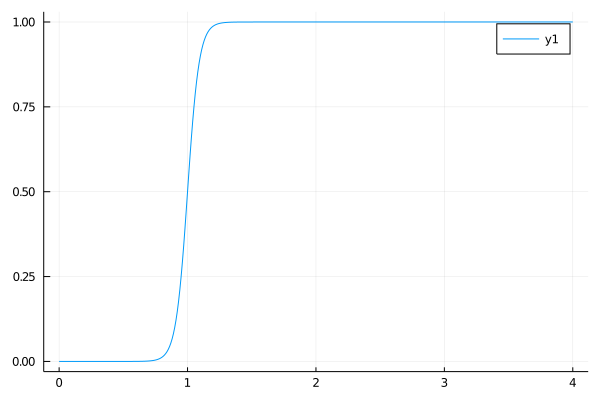

In [20]:
plot(t,modfcn.(t))
#plot!(t,modfcn2.(t))

In [23]:
gf = GeneratedField(w,onegauss,gr)
mf = ModulatedField(gf,modfcn)

ModulatedField(GeneratedField{Nodes{Dual,208,140,Float64,Array{Float64,2}}}(Dual nodes in a (nx = 208, ny = 140) cell grid of type Float64 data
  Number of Dual nodes: (nx = 208, ny = 140), AbstractSpatialField[SpatialGaussian{false,CartesianGrids.ShiftedProfile{Float64,Gaussian},CartesianGrids.ShiftedProfile{Float64,Gaussian}}(Gaussian (σ = 0.17, A = 1.0) >> 0.0, Gaussian (σ = 0.17, A = 1.0) >> 0.5, 1.0, 0.0, 0.0)], PhysicalGrid{2}((208, 140), (104, 70), 0.03, ((-3.09, 3.09), (-2.07, 2.07)))), d/dt (logcosh ramp (aₛ = 11.0) >> 1.0))

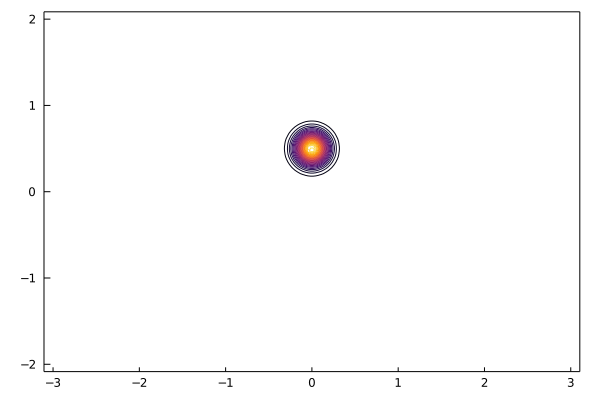

In [38]:
plot(mf(1.1),gr,levels=range(0,10,length=31),clims=(0,10))